<a href="https://colab.research.google.com/github/pritikrishna54/Stock-market-prediction/blob/main/Stock_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Data Collection
ticker = "AAPL"  # Apple stock ticker
data = yf.download(ticker, start="2015-01-01", end="2022-12-31")
close_prices = data['Close'].values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Step 2: Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Step 3: Prepare Training and Testing Data
def create_dataset(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

x_train, y_train = create_dataset(train_data, sequence_length)
x_test, y_test = create_dataset(test_data, sequence_length)


In [ ]:
# Reshape data for LSTM input
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile and Train the Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0174
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0012
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9.2634e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 7.4603e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 9.0810e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 6.8243e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0010
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.5566e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 7.5045e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 6.9701e-04
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 6.2353e-04
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 5.2698e-04
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 6.9933e-04
Epoch 15/50
49/49 ━━━━━━━━━━━━━

In [ ]:
# Step 5: Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


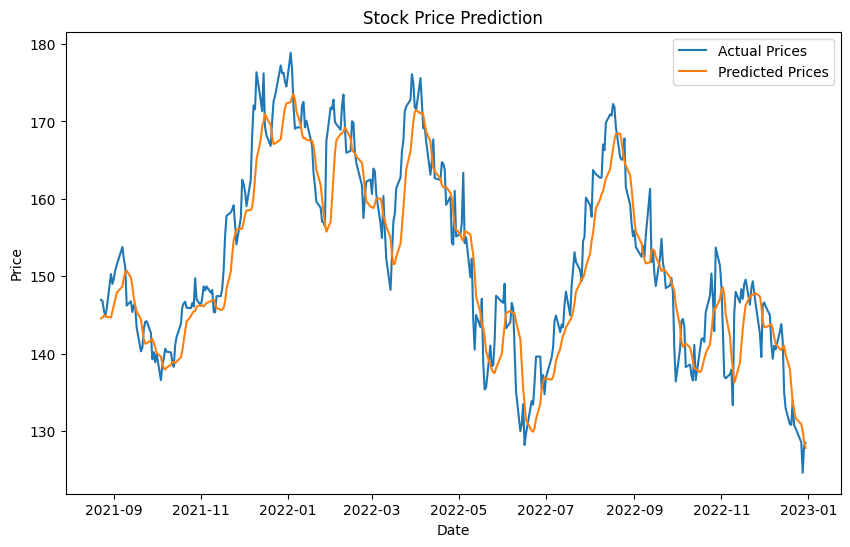

In [ ]:
# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size+sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), label="Actual Prices")
plt.plot(data.index[train_size+sequence_length:], predictions, label="Predicted Prices")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()